In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# graphics in svg format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
# Read the data
train = pd.read_csv('U:\\projects\\data Science\\Energy Prediction Use Case\\data\\training_transformed.csv')
test = pd.read_csv('U:\\projects\\data Science\\Energy Prediction Use Case\\data\\testing_transformed.csv')

In [3]:
train.shape

(14803, 36)

In [4]:
train.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,rv1,rv2,NSM,WeekStatus,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,13.275433,13.275433,61200,1,1,0,0,0,0,0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.606195,18.606195,61800,1,1,0,0,0,0,0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,28.642668,28.642668,62400,1,1,0,0,0,0,0
3,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,10.084097,10.084097,63600,1,1,0,0,0,0,0
4,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,...,44.919484,44.919484,64200,1,1,0,0,0,0,0


In [5]:
test.shape

(4932, 36)

In [6]:
test.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,rv1,rv2,NSM,WeekStatus,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,45.723333,...,45.410389,45.410389,63000,1,1,0,0,0,0,0
1,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,45.790000,...,47.233763,47.233763,64800,1,1,0,0,0,0,0
2,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,46.430000,...,10.298729,10.298729,67200,1,1,0,0,0,0,0
3,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,46.430000,...,8.827838,8.827838,67800,1,1,0,0,0,0,0
4,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,48.490000,...,24.884962,24.884962,70200,1,1,0,0,0,0,0


In [7]:
train.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

## Build Models

In [7]:
# Assign X & y for both training/test set

# Remove reduntant features identified in feature selection: rv1,rv2,Press_mm_hg,T4,RH_4 & T5,RH_5

X_train = train[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'NSM', 'WeekStatus', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']]
y_train = train[['Appliances']]

X_test = test[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'NSM', 'WeekStatus', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']]
y_test = test[['Appliances']]

In [8]:
# Enable printing multiple outputs (if any) for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # default is last_exp

### Decision Tree

In [9]:
# Fitting Decision Tree Regression to the Training set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train model
DTModel = DecisionTreeRegressor(criterion = 'mse', random_state = 123)
DTModel.fit(X_train, y_train)

# Predicting the Test set results
y_pred = DTModel.predict(X_test)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=123, splitter='best')

R**2 score, the coefficient of determination is: 0.14132617569477635
Mean Absolute Error: 38.44079480940795
Mean Squared Error: 8340.450121654501
Root Mean Squared Error: 91.32606485365775


#### Plot feature importances

In [10]:
results = pd.DataFrame(index=X_train.columns, data={'importance':DTModel.feature_importances_})
print('Feature importances:\n{}'.format(results))

Feature importances:
            importance
lights        0.030728
T1            0.016471
RH_1          0.041324
T2            0.044026
RH_2          0.050901
T3            0.055697
RH_3          0.066887
T6            0.047119
RH_6          0.044576
T7            0.036104
RH_7          0.042562
T8            0.040637
RH_8          0.030698
T9            0.031230
RH_9          0.028915
T_out         0.041390
RH_out        0.043000
Windspeed     0.036434
Visibility    0.034775
Tdewpoint     0.025342
NSM           0.189257
WeekStatus    0.002218
Monday        0.008459
Saturday      0.004219
Sunday        0.000842
Thursday      0.000834
Tuesday       0.000649
Wednesday     0.004707


Text(0.5, 1.0, 'Normalized Feature Importances')

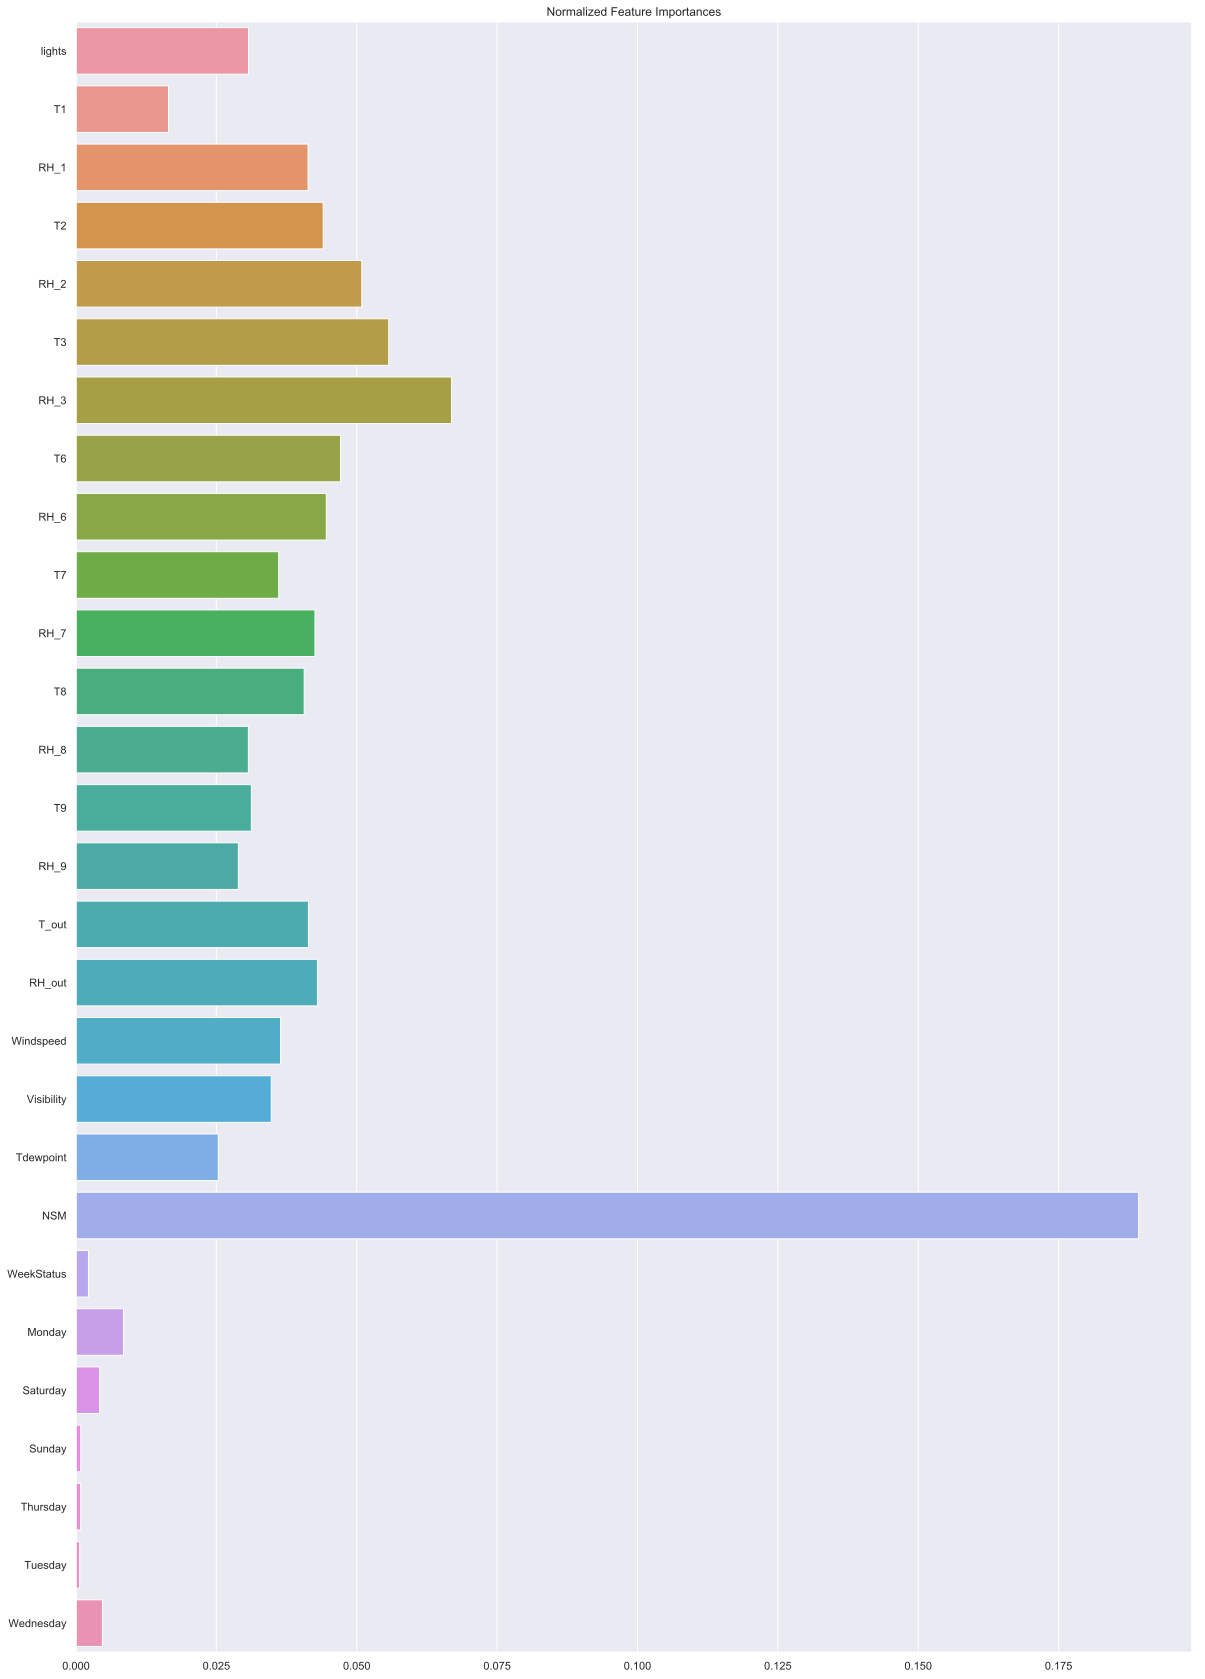

In [11]:
# Plot feature importances
plt.rcParams['figure.figsize'] = 20,30
plt.title('Normalized Feature Importances')
sns.barplot(y=X_train.columns, x=DTModel.feature_importances_)
plt.show()
#NSM is the MOST IMPORTANT FEATURE

In [ ]:
# Visualizing the tree
from sklearn import tree
plt.figure(figsize = [8,8])
tree.plot_tree(DTModel)
plt.show()

<Figure size 576x576 with 0 Axes>

[Text(216.77434858807834, 430.048, 'X[20] <= 27300.0\nentropy = 10572.887\nsamples = 14803\nvalue = 98.011'),
 Text(79.60980085462747, 420.384, 'X[20] <= 25500.0\nentropy = 975.78\nsamples = 4698\nvalue = 53.176'),
 Text(57.834740986018645, 410.71999999999997, 'X[13] <= 19.482\nentropy = 584.976\nsamples = 4387\nvalue = 51.518'),
 Text(27.897284918888683, 401.056, 'X[0] <= 15.0\nentropy = 369.549\nsamples = 2319\nvalue = 47.055'),
 Text(6.258734277272932, 391.392, 'X[6] <= 34.897\nentropy = 256.642\nsamples = 2234\nvalue = 46.289'),
 Text(0.1805800512187902, 381.728, 'X[7] <= -0.917\nentropy = 3355.102\nsamples = 14\nvalue = 91.429'),
 Text(0.1203867008125268, 372.064, 'entropy = 0.0\nsamples = 1\nvalue = 270.0'),
 Text(0.2407734016250536, 372.064, 'X[7] <= -0.833\nentropy = 971.598\nsamples = 13\nvalue = 77.692'),
 Text(0.1203867008125268, 362.4, 'X[16] <= 95.917\nentropy = 1600.0\nsamples = 2\nvalue = 120.0'),
 Text(0.0601933504062634, 352.736, 'entropy = 0.0\nsamples = 1\nvalue = 16

In [ ]:
# Visualizing the tree
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

names = X_train.columns
dot_data = StringIO()
export_graphviz(DTModel, out_file=dot_data,  feature_names=names, filled=True,
                rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

This is a bit hard to read due to the size of the tree produced with depth 4. You'll make other trees with varying depths. To make it easier to visualize decision tree models, you can embed the code for producing the diagram within a function.

In [ ]:
def visualize_decision_tree(tree, filled = True, rounded =T rue,
                            special_characters=True, **kwargs):
    '''Produces Image (for display in notebook) from decision tree model
    Input:
    tree: (trained) sklearn DecisionTreeRegressor or DecisionTreeClassifier
    filled: (default True) whether to fill boxes
    rounded: (default True) whether to round corners of boxes
    special_characters: (default True) whether to permit special characters in labels
    **kwargs: other optional keyword arguments as accepted by 
              sklearn.tree.export_graphviz
    Output: returns IPython.display.Image object
    '''
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, filled=filled,
                    rounded=rounded, special_characters=special_characters,
                    **kwargs)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

Now you can instantiate new trees with different depths and easily produce flowcharts

In [ ]:
tree2 = DecisionTreeRegressor(max_depth = 2, random_state=123)
tree2.fit(X_train, y_train)
visualize_decision_tree(tree2, feature_names=X_train.columns)

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

# Train model
LRModel = LogisticRegression().fit(X_train, y_train)

# Predicting the Test set results
y_pred = LRModel.predict(X_test)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


R**2 score, the coefficient of determination is: -31.656826771057617
Mean Absolute Error: 47.73317112733171
Mean Squared Error: 11769.951338199513
Root Mean Squared Error: 108.48940657133079


### Support Vector Regression (SVR)

Based on input relationship with output (target) variable, choose the kernel = linear or non-linear (polynomial/gaussian) i.e. 'rbf'

In [14]:
# SVR needs scaled input

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [15]:
from sklearn.svm import SVR

# Train model
SVRModel = SVR(kernel='linear').fit(X_train_sc, y_train)
 
# Predicting the Test set results
y_pred = SVRModel.predict(X_test_sc)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R**2 score, the coefficient of determination is: -23.24356017614196
Mean Absolute Error: 42.8294501600556
Mean Squared Error: 9996.109023062116
Root Mean Squared Error: 99.98054322247962


### Simple Linear Regression

Simple Linear regression works with single input. So I will pick most correlated/important feature as input 'NSM'.

In [16]:
# training set
X_train_sl = X_train['NSM'].values.reshape(-1,1)
y_train_sl = y_train['Appliances'].values.reshape(-1,1)

# test set
X_test_sl = X_test['NSM'].values.reshape(-1,1)
y_test_sl = y_test['Appliances'].values.reshape(-1,1)

In [17]:
from sklearn.linear_model import LinearRegression

# Train model
LRegressor = LinearRegression(fit_intercept=True)
LRegressor.fit(X_train_sl, y_train_sl)

# Predicting the Test set results
y_pred = LRegressor.predict(X_test_sl)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test_sl)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test_sl))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test_sl))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test_sl)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

R**2 score, the coefficient of determination is: -19.070511166229156
Mean Absolute Error: 55.07507757242332
Mean Squared Error: 9824.38357032297
Root Mean Squared Error: 99.11802848282935


In [18]:
# Priting the Slope and The Intercept

print("Model intercept:", LRegressor.intercept_)
print("Model slope:    ", LRegressor.coef_[0])

Model intercept: [59.74354436]
Model slope:     [0.00089024]


In [19]:
# Build data frame to compare actual vs predicted 
y_test_list = y_test_sl.tolist() # convert numpy array to python list
y_pred_list = y_pred.tolist() 
df = pd.DataFrame({'Actual': y_test_list, 'Predicted': y_pred_list})
df.head(10)

,Actual,Predicted
0,[50],[115.82840413647303]
1,[60],[117.43082870150441]
2,[230],[119.56739478821291]
3,[580],[120.10153630989004]
4,[100],[122.23810239659855]
5,[70],[123.3063854399528]
6,[190],[125.44295152666132]
7,[110],[125.97709304833845]
8,[100],[128.6478006567241]
9,[60],[132.92093283014108]


In [ ]:
# Now let's plot the comparison of Actual and Predicted values
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Multiple Linear Regression

In [20]:
# Train model
MltRegressor = LinearRegression()
MltRegressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = MltRegressor.predict(X_test)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

R**2 score, the coefficient of determination is: -3.6427298905951515
Mean Absolute Error: 52.00263057067628
Mean Squared Error: 8674.836405725307
Root Mean Squared Error: 93.13880182676449


In [21]:
# To see what coefficients our regression model has chosen, execute the following script:
coeff_df = pd.DataFrame(MltRegressor.coef_.T, index=X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
lights,1.881917
T1,-5.783732
RH_1,14.445235
T2,-17.999643
RH_2,-14.005323
T3,26.175577
RH_3,6.114250
T6,6.957469
RH_6,0.266663
T7,2.029396


### Ridge Regression

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model measured as the sum squared value of the coefficient values (also called the L2-norm). You can construct a ridge regression model by using the Ridge class.

In [22]:
# Ridge Regression

# ‘explained_variance’ -- > metrics.explained_variance_score
# ‘max_error’ -- > metrics.max_error
# ‘neg_mean_absolute_error’ -- > metrics.mean_absolute_error
# ‘neg_mean_squared_error’ -- > metrics.mean_squared_error
# ‘neg_root_mean_squared_error’ -- > metrics.mean_squared_error
# ‘neg_mean_squared_log_error’ -- > metrics.mean_squared_log_error
# ‘neg_median_absolute_error’ -- > metrics.median_absolute_error
# ‘r2’ -- > metrics.r2_score
# ‘neg_mean_poisson_deviance’ -- > metrics.mean_poisson_deviance
# ‘neg_mean_gamma_deviance’ -- > metrics.mean_gamma_deviance


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

kfold = KFold(n_splits=10, random_state=123)
Rmodel = Ridge()
scoring = 'r2'
results = cross_val_score(Rmodel, X_train, y_train, cv=kfold, scoring=scoring)
print('Model R2 Mean: ', results.mean())

Rmodel.fit(X_train, y_train)

# Predicting the Test set results
y_pred = Rmodel.predict(X_test)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

Model Mean:  0.1316177134640503


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

R**2 score, the coefficient of determination is: -3.643698517785193
Mean Absolute Error: 52.00178041706756
Mean Squared Error: 8674.862356670192
Root Mean Squared Error: 93.13894113994529


### LASSO Regression

The Least Absolute Shrinkage and Selection Operator (or LASSO for short) is a modification of linear regression, like ridge regression, where the loss function is modified to minimize the
complexity of the model measured as the sum absolute value of the coefficient values (also called the L1-norm). You can construct a LASSO model by using the Lasso class3.

In [23]:
# Lasso Regression


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

kfold = KFold(n_splits=10, random_state=123)
Lmodel = Lasso()
scoring = 'r2'
results = cross_val_score(Lmodel, X_train, y_train, cv=kfold, scoring=scoring)
print('Model R2 Mean: ', results.mean())

Model R2 Mean:  0.13041383855231387


### ElasticNet Regression

ElasticNet is a form of regularization regression that combines the properties of both Ridge Regression and LASSO regression. It seeks to minimize the complexity of the regression model
(magnitude and number of regression coefficients) by penalizing the model using both the L2-norm (sum squared coefficient values) and the L1-norm (sum absolute coefficient values). You can construct an ElasticNet model using the ElasticNet class.

In [24]:
# ElasticNet Regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet

kfold = KFold(n_splits=10, random_state=123)
Emodel = ElasticNet()
scoring = 'r2'
results = cross_val_score(Emodel, X_train, y_train, cv=kfold, scoring=scoring)
print('Model R2 Mean: ', results.mean())

Model R2 Mean:  0.11441265939100029


### Ensemble Methods

In modern applied machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.) almost always outperform singular decision trees, so we'll jump right into those:

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Train model
RFModel = RandomForestRegressor(n_estimators=50, random_state=123)
RFModel.fit(X_train, y_train)
 
# Predict on test set
y_pred = RFModel.predict(X_test)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

R**2 score, the coefficient of determination is: 0.03755759325214758
Mean Absolute Error: 33.002919708029204
Mean Squared Error: 5033.73206812652
Root Mean Squared Error: 70.94879891954845


In [26]:
# Bagging Regressor
from sklearn.ensemble import BaggingRegressor
from sklearn import tree

# Train model
BModel = BaggingRegressor(tree.DecisionTreeRegressor(random_state=123))
BModel.fit(X_train, y_train)

# Predicting the Test set results
y_pred = BModel.predict(X_test)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=123,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples

R**2 score, the coefficient of determination is: 0.05210288091354509
Mean Absolute Error: 34.696877534468776
Mean Squared Error: 5497.934103811841
Root Mean Squared Error: 74.14805529352635


In [27]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

# Train model
AdaModel = AdaBoostRegressor()
AdaModel.fit(X_train, y_train)
 
# Predict on test set
y_pred = AdaModel.predict(X_test)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

R**2 score, the coefficient of determination is: -1.233630932573941
Mean Absolute Error: 85.33177397093493
Mean Squared Error: 13337.389667846473
Root Mean Squared Error: 115.48761694591535


In [28]:
# GradientBoost
from sklearn.ensemble import GradientBoostingRegressor

# Train model
GBModel = GradientBoostingRegressor(learning_rate=1.0, max_depth=1, random_state=123)
GBModel.fit(X_train, y_train)
 
# Predict on test set
y_pred = GBModel.predict(X_test)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R**2 score, the coefficient of determination is: -2.018591242996979
Mean Absolute Error: 50.82510351068423
Mean Squared Error: 7986.266482625301
Root Mean Squared Error: 89.36591342690625


In [29]:
# Extreme GradientBoost
from xgboost import XGBRegressor

# Train model
params = {'objective': 'reg:squarederror', 'colsample_bytree': 0.3, 'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10, 'n_estimators': 50}
XGBModel = XGBRegressor(**params)
XGBModel.fit(X_train, y_train)

# Predict on test set
y_pred = XGBModel.predict(X_test)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

R**2 score, the coefficient of determination is: -2.3094557250901926
Mean Absolute Error: 42.862328907192385
Mean Squared Error: 6937.051469993267
Root Mean Squared Error: 83.28896367462659


In [30]:
# CatBoost
from catboost import CatBoostRegressor

# Train model
CBModel = CatBoostRegressor(iterations=2, 
                          depth=2, 
                          learning_rate=1, 
                          loss_function='RMSE')
CBModel.fit(X_train, y_train)

# Predict on test set
y_pred = CBModel.predict(X_test)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

ModuleNotFoundError: No module named 'catboost'

### Prediction with Statistical Modeling (Stats Models)

In [34]:
import statsmodels.api as sm

# add columnn for the intercept term
X_train_i = sm.add_constant(X_train, prepend=False)
X_test_i = sm.add_constant(X_test, prepend=False)

# instantiate model
lin_mod = sm.OLS(y_train, X_train_i)

# fit the beta coefs
SMMLRegression = lin_mod.fit()

# Predict on test set
y_pred = SMMLRegression.predict(X_test_i)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))
print('\n')
print(SMMLRegression .summary())

R**2 score, the coefficient of determination is: -3.6427298905959615
Mean Absolute Error: 52.002630570673325
Mean Squared Error: 8674.836405725398
Root Mean Squared Error: 93.13880182676498


                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     118.5
Date:                Tue, 11 Feb 2020   Prob (F-statistic):               0.00
Time:                        09:34:25   Log-Likelihood:                -88136.
No. Observations:               14803   AIC:                         1.763e+05
Df Residuals:                   14775   BIC:                         1.765e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 c

C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Optimizing chosen Algorithms - Tune Hyper parameters

Based on High R2 and low errors: I would optimize Decision Tree, Random Forest, Bagging & xgboost

In [3]:
# Read merged, transformed date set - ready to feed into models
energy = pd.read_csv('U:\\projects\\data Science\\Energy Prediction Use Case\\data\\energy_transformed.csv')
energy.drop('date',axis=1, inplace=True)
energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T6,RH_6,...,Visibility,Tdewpoint,NSM,WeekStatus,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,7.026667,84.256667,...,63.000000,5.3,61200,1,1,0,0,0,0,0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,6.833333,84.063333,...,59.166667,5.2,61800,1,1,0,0,0,0,0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,6.560000,83.156667,...,55.333333,5.1,62400,1,1,0,0,0,0,0
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,6.433333,83.423333,...,51.500000,5.0,63000,1,1,0,0,0,0,0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,6.366667,84.893333,...,47.666667,4.9,63600,1,1,0,0,0,0,0


In [4]:
# Assign X & y

X=energy.iloc[:,1:] ## independent features
y=energy.iloc[:,0] ## dependent features

X.head(2)
y.head(2)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T6,RH_6,T7,...,Visibility,Tdewpoint,NSM,WeekStatus,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,30,19.89,47.596667,19.2,44.7900,19.79,44.73,7.026667,84.256667,17.2,...,63.000000,5.3,61200,1,1,0,0,0,0,0
1,30,19.89,46.693333,19.2,44.7225,19.79,44.79,6.833333,84.063333,17.2,...,59.166667,5.2,61800,1,1,0,0,0,0,0


0    60
1    60
Name: Appliances, dtype: int64

### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

DTModel = DecisionTreeRegressor(criterion='mse', max_depth=2, random_state = 123)
param_grid = {#"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
            #  "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

DTModel_regressor = GridSearchCV(DTModel, param_grid, cv=5,n_jobs=-1)
DTModel_regressor.fit(X,y)

print("\n The best score across ALL searched params:\n", DTModel_regressor.best_score_)
print("\n The best parameters across ALL searched params:\n", DTModel_regressor.best_params_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=2,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=123,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]},
             pre_dispatch='2*n_jobs', re


 The best score across ALL searched params:
 0.11549890475769986

 The best parameters across ALL searched params:
 {'max_leaf_nodes': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}


### Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

RFModel = RandomForestRegressor(n_estimators=200,max_features='auto',criterion='mse', max_depth=2, random_state=123)
param_grid = { 
   # 'n_estimators': [100, 200, 500],
   # 'max_features': ['auto', 'sqrt', 'log2'],
   # 'max_depth' : [4,5,6,7,8],
   # 'criterion' :['mse', 'mae']
     'min_samples_split': [10, 20, 40],
     'min_samples_leaf': [20, 40, 100],
     'max_leaf_nodes': [5, 20, 100]
}

RFModel_regressor = GridSearchCV(RFModel, param_grid, cv=5,n_jobs=-1)
RFModel_regressor.fit(X,y)

print("\n The best score across ALL searched params:\n", RFModel_regressor.best_score_)
print("\n The best parameters across ALL searched params:\n", RFModel_regressor.best_params_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=2, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=200, n_jobs=None,
                                             oob_score=False, random_state=123,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40,


 The best score across ALL searched params:
 0.11211283751571988

 The best parameters across ALL searched params:
 {'max_leaf_nodes': 5, 'min_samples_leaf': 40, 'min_samples_split': 10}


### Bagging

In [16]:
# Check the list of available parameters with `estimator.get_params().keys()`

BModel.get_params().keys()

dict_keys(['base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__presort', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [18]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree

# Train model
BModel = BaggingRegressor(tree.DecisionTreeRegressor(criterion='mse', max_depth=2, random_state=123), 
                          n_estimators=200)
param_grid = { 
   # 'n_estimators': [100, 200, 500],
   # 'max_features': [2, 4, 6, 8],
   # 'base_estimator__max_depth' : [4,5,6,7,8],
   # 'base_estimator__criterion' :['mse', 'mae']
     'base_estimator__min_samples_split': [10, 20, 40],
     'base_estimator__min_samples_leaf': [20, 40, 100],
     'base_estimator__max_leaf_nodes': [5, 20, 100]
}

BModel_regressor = GridSearchCV(BModel, param_grid, cv=5,n_jobs=-1)
BModel_regressor.fit(X,y)

print("\n The best score across ALL searched params:\n", BModel_regressor.best_score_)
print("\n The best parameters across ALL searched params:\n", BModel_regressor.best_params_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                                             max_depth=2,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                                                                             min_weight_fraction_leaf=0.0,
                                                              


 The best score across ALL searched params:
 0.11353072781202103

 The best parameters across ALL searched params:
 {'base_estimator__max_leaf_nodes': 20, 'base_estimator__min_samples_leaf': 40, 'base_estimator__min_samples_split': 40}


### xgboost

In [20]:
from xgboost import XGBRegressor

params = {'objective': 'reg:squarederror', 'colsample_bytree': 0.3, 'learning_rate': 0.1,
                'max_depth': 5 }
XGBModel = XGBRegressor(**params)
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
          'n_estimators': [100, 200, 500]}
XGBModel_regressor = GridSearchCV(XGBModel, parameters, scoring='r2',cv=5,n_jobs=-1)
XGBModel_regressor.fit(X,y)

print("\n The best score across ALL searched params:\n", XGBModel_regressor.best_score_)
print("\n The best parameters across ALL searched params:\n", XGBModel_regressor.best_params_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.3, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20


 The best score across ALL searched params:
 -0.5284661636109476

 The best parameters across ALL searched params:
 {'alpha': 1e-15, 'n_estimators': 100}


### Ridge Regression

In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5,n_jobs=-1)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [7]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
0.12677884103414577


### Lasso Regression 

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=5,n_jobs=-1)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
print(lasso_regressor.best_estimator_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'alpha': 1e-15}
0.12636642765849934
Lasso(alpha=1e-15, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


### Multiple Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=5,n_jobs=-1)
grid.fit(X, y)

print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


 The best score across ALL searched params:
 0.12637175740965015

 The best parameters across ALL searched params:
 {'copy_X': True, 'fit_intercept': True, 'normalize': False}


### Gradient Boosting Regressor

In [59]:
model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8] 
                 }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X, y)
    
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

KeyboardInterrupt: 

### Logistic Regression

In [61]:
# Create logistic regression
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0,n_jobs=-1)

# Fit grid search
best_model = clf.fit(X, y)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

print("\n The best score across ALL searched params:\n", clf.best_score_)
print("\n The best parameters across ALL searched params:\n", clf.best_params_)

C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to 

KeyboardInterrupt: 